MAPE: 11.44%
BIAS: -705.25


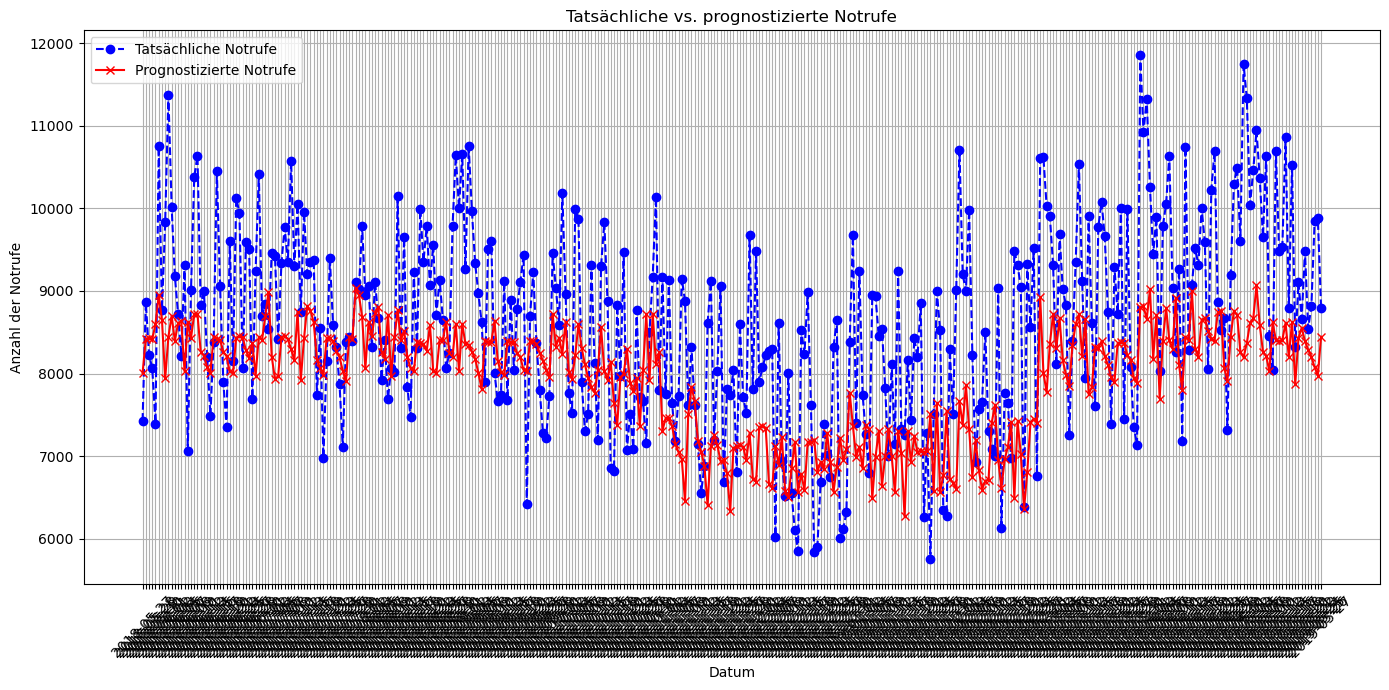

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_percentage_error

# Daten laden
df1 = pd.read_csv('/Users/frederic/Desktop/Fallstudie-Model-Engineering/data/processed/train_data.csv')
df2 = pd.read_csv('/Users/frederic/Desktop/Fallstudie-Model-Engineering/data/processed/test_data.csv')

# Unabhängige Variablen (Features)
features = ['weekday', 'schulferien', 'calendarweek', 'month', 'quarter', 
            'Feiertage', 'season', 'year', 'lag_49_calls', 'lag_365_calls', 
            'average7days45lag_calls']

# Zielvariable
target = 'calls'

# Training und Testdaten vorbereiten
X_train = df1[features]
y_train = df1[target]

X_test = df2[features]
y_test = df2[target]

# Modell erstellen und trainieren
model = RandomForestRegressor(
    n_estimators=100,  # Mehr Bäume
    max_depth=5,      # Tiefe der Bäume
    min_samples_split=10,  # Minimale Anzahl von Samples für einen Split
    random_state=42
)
model.fit(X_train, y_train)

# Vorhersagen erstellen
predictions = model.predict(X_test)

# Berechnung des MAPE
mape = mean_absolute_percentage_error(y_test, predictions)
print(f'MAPE: {mape:.2%}')

# Berechnung des BIAS
bias = np.mean(predictions - y_test)
print(f'BIAS: {bias:.2f}')

# Visualisierung
plt.figure(figsize=(14, 7))

# Plot der tatsächlichen Werte
plt.plot(df2['date'], y_test, label='Tatsächliche Notrufe', color='blue', marker='o', linestyle='--')

# Plot der prognostizierten Werte
plt.plot(df2['date'], predictions, label='Prognostizierte Notrufe', color='red', marker='x', linestyle='-')

# Formatierung
plt.xlabel('Datum')
plt.ylabel('Anzahl der Notrufe')
plt.title('Tatsächliche vs. prognostizierte Notrufe')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)

# Anzeigen der Visualisierung
plt.tight_layout()
plt.show()
